<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment4(Q1)_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
---


In [65]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
# import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from copy import deepcopy

---

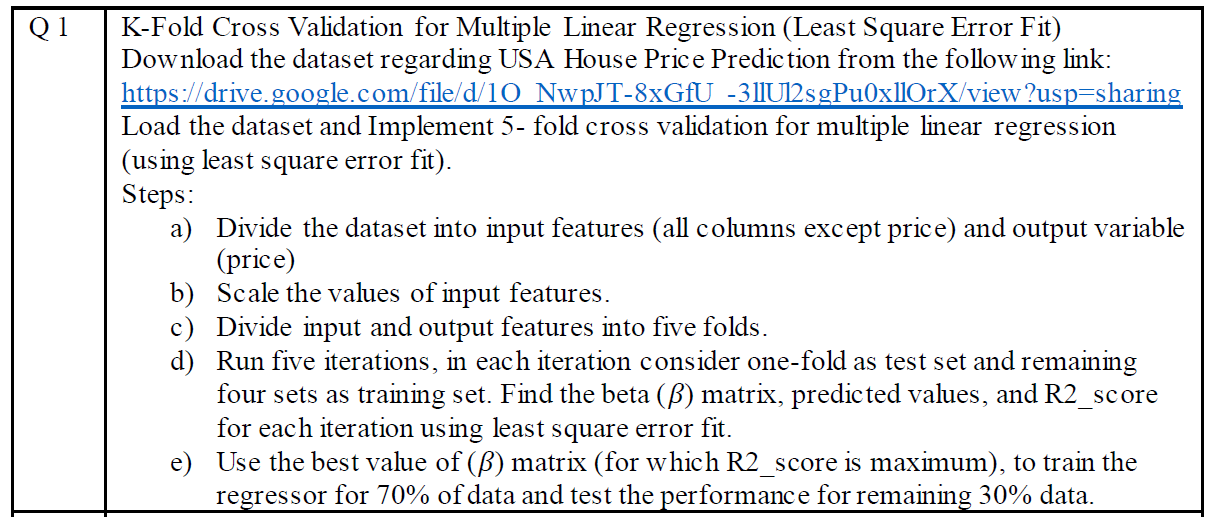

In [66]:
usa = pd.read_csv("/content/USA_Housing.csv")

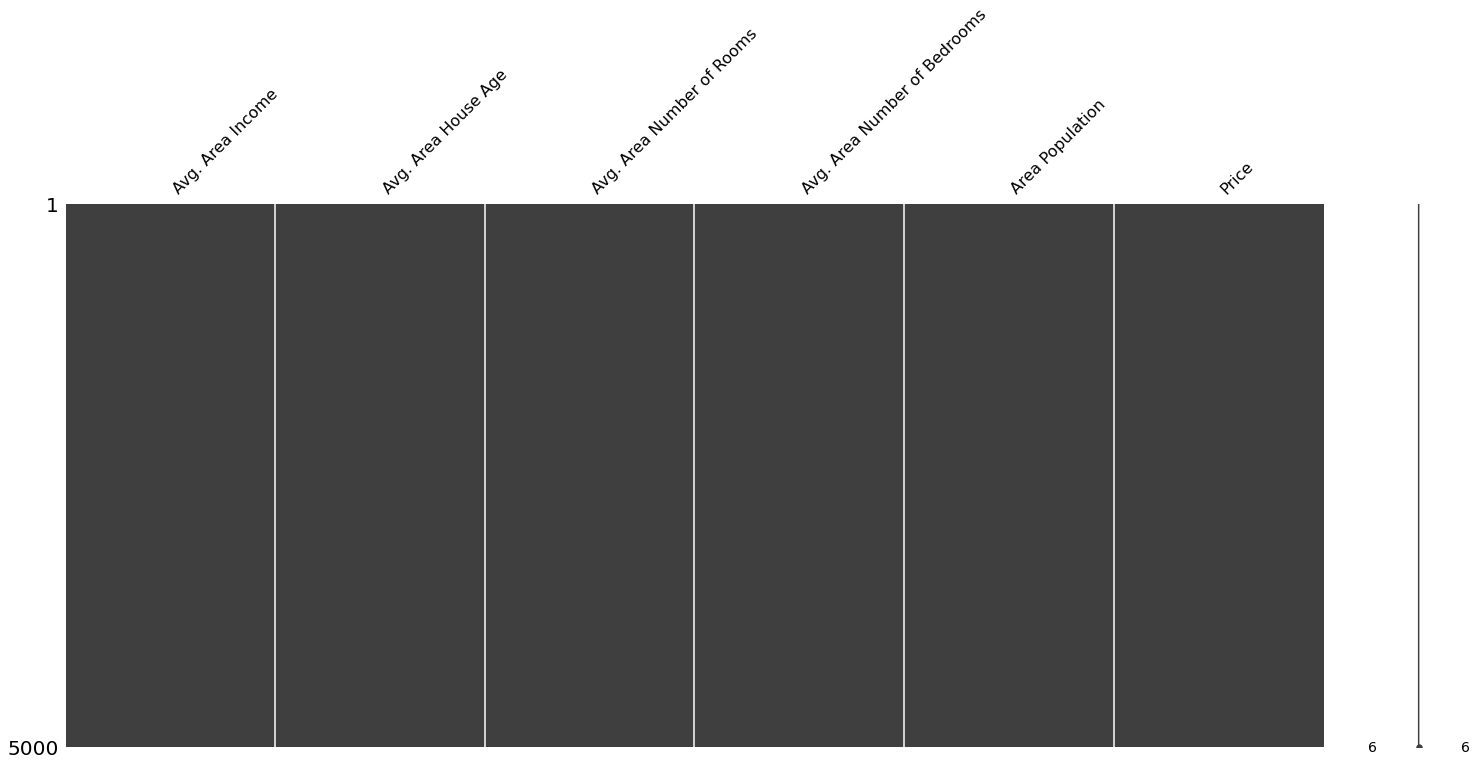

In [67]:
#visualising data for missing values
msno.matrix(usa) 

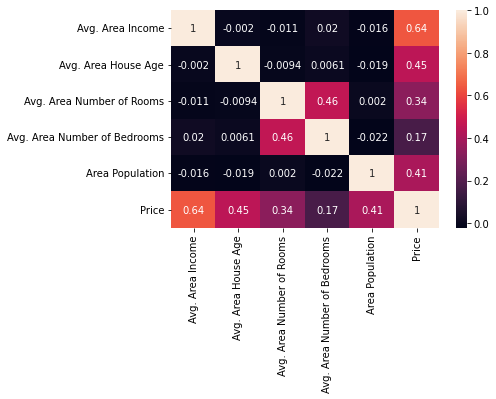

In [68]:
#making correlation heatmap
corr = usa.corr()
sns.heatmap(corr,annot=True)

---

In [69]:
input_Features = usa.iloc[:,:5]
output_Features = usa.iloc[:,5]

In [70]:
#Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(input_Features.to_numpy())
X_scaled = pd.DataFrame(X_scaled,)

In [71]:
#SHUFFLING THE DATAFRAME
X_scaled['Price'] = output_Features
Data= X_scaled.sample(frac = 1)

In [72]:
#Splitting into folds
folds = np.array_split(Data,5)

In [80]:
#Running 5 iterations:
R2_Taken = -1
Betas = []
Val  =-1
for j in range(0,5):
    test_Data = pd.DataFrame(folds[j])
    train_Data = pd.DataFrame(columns=test_Data.columns)
    for i in range(0,5):
        if i!=j:
            train_Data = pd.concat((train_Data,folds[i]))

    #SPLITTING THE DATA
    Y_train = train_Data.pop('Price')
    X_train = train_Data

    Y_test = test_Data.pop('Price')
    X_test = test_Data

    #FITTING A LINEAR MODEL
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    #Getting the Beta Matrix
    B = np.insert(lm.coef_,0,lm.intercept_)
    Beta = pd.DataFrame({'Beta':B})
    print(Beta)


    #predicting Values
    y_predict = lm.predict(X_test)
    
    Out = pd.DataFrame({'actual values':Y_test,'Predicted values':y_predict})
    print(Out.head())

    #calculating R2 score
    R2 = r2_score(Y_test,y_predict)
    print("R2->",R2)
    if R2>=R2_Taken:
        R2_Taken = deepcopy(R2)
        Betas = deepcopy(Beta)
        Val = deepcopy(j)
    print("_____________________________________________")

           Beta
0 -1.428896e+06
1  1.943059e+06
2  1.139139e+06
3  9.162643e+05
4  6.890867e+03
5  1.061595e+06
      actual values  Predicted values
4456   1.347904e+06      1.375122e+06
2842   1.296645e+06      1.231114e+06
3009   1.574182e+06      1.381149e+06
11     6.637324e+05      6.283273e+05
1325   1.143215e+06      1.002296e+06
R2-> 0.9220616123961587
_____________________________________________
           Beta
0 -1.415299e+06
1  1.935568e+06
2  1.138936e+06
3  9.096427e+05
4  2.830385e+03
5  1.055089e+06
      actual values  Predicted values
3302   1.902119e+06      1.808652e+06
3164   1.129388e+06      1.005502e+06
1877   1.360788e+06      1.392130e+06
2519   7.122858e+05      7.794224e+05
259    1.367586e+06      1.458185e+06
R2-> 0.9199701329081789
_____________________________________________
           Beta
0 -1.415851e+06
1  1.941469e+06
2  1.143686e+06
3  8.898174e+05
4  1.135306e+04
5  1.057332e+06
      actual values  Predicted values
807    7.048842e+05      5.379

In [74]:
print("Selecting iteration",Val+1)

print("Fitting this Beta matrix")

intercept = Betas.iloc[0,0]
coeffs = np.array(Betas.iloc[1:,0])

Selecting iteration 1
Fitting this Beta matrix


In [75]:
#FITTING THE BETA MATRIX TO A NEW MODEL
model = LinearRegression()
model.coef_ = deepcopy(coeffs)
model.intercept_ = deepcopy(intercept)

In [76]:
#SPLITTING THE DATASET
train=usa.sample(frac=0.7)
test=usa.drop(train.index)

Y_train = train.pop('Price')
X_train = train

Y_test = test.pop('Price')
X_test = test


In [77]:
#FITTING THE LINEAR MODEL
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [78]:
#Getting the Beta Matrix
B = np.insert(lm.coef_,0,lm.intercept_)
Beta = pd.DataFrame({'Beta':B})
print('The NEW Beta matrix')
print(Beta)
print('---------------')

#predicting Values
y_predict = lm.predict(X_test)

Out = pd.DataFrame({'actual values':Y_test,'Predicted values':y_predict})
print(Out.head())
print('---------------')

#calculating R2 score
R2 = r2_score(Y_test,y_predict)
print("THE R2 SCORE IS>>",R2)


The NEW Beta matrix
           Beta
0 -2.650345e+06
1  2.166065e+01
2  1.660177e+05
3  1.212159e+05
4  1.912706e+03
5  1.525439e+01
---------------
    actual values  Predicted values
1    1.505891e+06      1.497429e+06
4    6.309435e+05      8.460951e+05
7    1.573937e+06      1.572326e+06
9    1.545155e+06      1.471950e+06
20   2.146925e+06      2.023601e+06
---------------
THE R2 SCORE IS>> 0.920258314519487


---